# Telecom Churn Case Study

### Business problem overview

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.
 
For many incumbent operators, retaining high profitable customers is the number one business goal.
 
To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.
 
In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Supress warnings

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression,LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE

from sklearn import metrics

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Reading and Understanding data

In [4]:
data = pd.read_csv('telecom_churn_data.csv')

In [5]:
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [6]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

In [7]:
data.shape

(99999, 226)

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
mobile_number,99999.0,7.001207e+09,695669.386290,7.000000e+09,7.000606e+09,7.001205e+09,7.001812e+09,7.002411e+09
circle_id,99999.0,1.090000e+02,0.000000,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02
loc_og_t2o_mou,98981.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
std_og_t2o_mou,98981.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
loc_ic_t2o_mou,98981.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
arpu_6,99999.0,2.829874e+02,328.439770,-2.258709e+03,9.341150e+01,1.977040e+02,3.710600e+02,2.773109e+04
arpu_7,99999.0,2.785366e+02,338.156291,-2.014045e+03,8.698050e+01,1.916400e+02,3.653445e+02,3.514583e+04
arpu_8,99999.0,2.791547e+02,344.474791,-9.458080e+02,8.412600e+01,1.920800e+02,3.693705e+02,3.354362e+04
arpu_9,99999.0,2.616451e+02,341.998630,-1.899505e+03,6.268500e+01,1.768490e+02,3.534665e+02,3.880562e+04
onnet_mou_6,96062.0,1.323959e+02,297.207406,0.000000e+00,7.380000e+00,3.431000e+01,1.187400e+02,7.376710e+03


#### percentage of null values in the dataset

In [9]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'])
missing_data.head(20)


,Total,Percent
arpu_3g_6,74846,0.748467
night_pck_user_6,74846,0.748467
total_rech_data_6,74846,0.748467
arpu_2g_6,74846,0.748467
max_rech_data_6,74846,0.748467
fb_user_6,74846,0.748467
av_rech_amt_data_6,74846,0.748467
date_of_last_rech_data_6,74846,0.748467
count_rech_2g_6,74846,0.748467
count_rech_3g_6,74846,0.748467


In [10]:
missing_data[missing_data>0].shape

(226, 2)

#### Converting datetime columns to correct format

In [11]:
date_col= data.select_dtypes(include=['object'])

In [12]:
date_col.columns

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_8', 'date_of_last_rech_9',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9'],
      dtype='object')

In [13]:
for i in date_col.columns:
    data[i] = pd.to_datetime(data[i])

In [14]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype         
---   ------                    -----         
 0    mobile_number             int64         
 1    circle_id                 int64         
 2    loc_og_t2o_mou            float64       
 3    std_og_t2o_mou            float64       
 4    loc_ic_t2o_mou            float64       
 5    last_date_of_month_6      datetime64[ns]
 6    last_date_of_month_7      datetime64[ns]
 7    last_date_of_month_8      datetime64[ns]
 8    last_date_of_month_9      datetime64[ns]
 9    arpu_6                    float64       
 10   arpu_7                    float64       
 11   arpu_8                    float64       
 12   arpu_9                    float64       
 13   onnet_mou_6               float64       
 14   onnet_mou_7               float64       
 15   onnet_mou_8               float64       
 16   onnet_mou_9               float64     

#### Checking all columns which have no variance and only one unique value

In [15]:
tempcols = []
for i in data.columns:
    if data[i].nunique() == 1:
        tempcols.append(i)
print(tempcols)

['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9']


Dropping these columns as they have no variance

In [16]:
data.drop(labels=tempcols,axis=1,inplace=True)

In [17]:
data.shape

(99999, 210)

#### Imputing Mobile Internet Recharge columns

In [18]:
data[['date_of_last_rech_data_6','total_rech_data_6','max_rech_data_6']].head(5)

,date_of_last_rech_data_6,total_rech_data_6,max_rech_data_6
0,2014-06-21,1.0,252.0
1,NaT,NaN,NaN
2,NaT,NaN,NaN
3,NaT,NaN,NaN
4,2014-06-04,1.0,56.0


if date_of_last_rech_data_6 is null and max_rech_data_6 is null and impute total_rech_data_6 is null we can impute  max_rech_data_6 as 0 and total_rech_data_6 as 0.

Imputing based on these for all months

In [19]:
for i in range(len(data)):
    if pd.isnull(data['date_of_last_rech_data_6'][i]):
        if pd.isnull(data['max_rech_data_6'][i]):
            if pd.isnull(data['total_rech_data_6'][i]):
                data['max_rech_data_6'][i]=0
                data['total_rech_data_6'][i]=0
    
    if pd.isnull(data['date_of_last_rech_data_7'][i]):
        if pd.isnull(data['max_rech_data_7'][i]):
            if pd.isnull(data['total_rech_data_7'][i]):
                data['max_rech_data_7'][i]=0
                data['total_rech_data_7'][i]=0
                
    if pd.isnull(data['date_of_last_rech_data_8'][i]):
        if pd.isnull(data['max_rech_data_8'][i]):
            if pd.isnull(data['total_rech_data_8'][i]):
                data['max_rech_data_8'][i]=0
                data['total_rech_data_8'][i]=0
                
    if pd.isnull(data['date_of_last_rech_data_9'][i]):
        if pd.isnull(data['max_rech_data_9'][i]):
            if pd.isnull(data['total_rech_data_9'][i]):
                data['max_rech_data_9'][i]=0
                data['total_rech_data_9'][i]=0

#### Dropping columns date_of_last_rech_data

In [20]:
cols = ['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9']
data.drop(labels=cols,axis=1,inplace=True)

#### Imputing avg_rech_amt_data

if total recharge data for a month is 0 we can impute avg rech amount for the month also as 0

In [21]:
for i in range(len(data)):
    if (data['total_rech_data_6'][i]==0):
        if pd.isnull(data['av_rech_amt_data_6'][i]):
                data['av_rech_amt_data_6'][i]=0
                
    if (data['total_rech_data_7'][i] == 0):
         if pd.isnull(data['av_rech_amt_data_7'][i]):
                data['av_rech_amt_data_7'][i]=0
                
    if (data['total_rech_data_8'][i]==0):
         if pd.isnull(data['av_rech_amt_data_8'][i]):
                data['av_rech_amt_data_8'][i]=0
                
    if (data['total_rech_data_9'][i]==0):
         if pd.isnull(data['av_rech_amt_data_9'][i]):
                data['av_rech_amt_data_9'][i]=0

#### Imputing og_mou columns

In [22]:
data[['std_og_mou_6','isd_og_mou_6','spl_og_mou_6','loc_og_mou_6','total_og_mou_6']].head(10)

,std_og_mou_6,isd_og_mou_6,spl_og_mou_6,loc_og_mou_6,total_og_mou_6
0,NaN,NaN,NaN,NaN,0.00
1,0.23,0.0,4.68,35.39,40.31
2,47.64,0.0,46.56,60.66,155.33
3,29.23,0.0,10.96,183.03,223.23
4,9.31,0.0,0.00,117.96,127.28
5,2.88,0.0,0.00,66.56,69.44
6,0.00,0.0,0.11,333.64,333.76
7,60.86,0.0,4.50,422.16,487.53
8,130.26,0.0,0.00,378.09,508.36
9,25.45,0.0,0.66,71.93,98.04


In [23]:
data['total_og_mou_6'].isnull().sum()

0

There are no null values in total_og_mou_6. We can observe that total_og_mou_6 = std_og_mou_6+isd_og_mou_6+spl_og_mou_6+spl_og_mou_6

if total_og_mou_6 is zero, other values can be imputed as 0

Imputing based on this for all months

In [24]:
for i in range(len(data)):
    if (data['total_og_mou_6'][i] == 0):
        if pd.isnull(data['std_og_mou_6'][i]):
                data['std_og_mou_6'][i]=0
        if pd.isnull(data['isd_og_mou_6'][i]):
                data['isd_og_mou_6'][i]=0
        if pd.isnull(data['spl_og_mou_6'][i]):
                data['spl_og_mou_6'][i]=0
        if pd.isnull(data['loc_og_mou_6'][i]):
                data['loc_og_mou_6'][i]=0
                
    if (data['total_og_mou_7'][i] == 0):
        if pd.isnull(data['std_og_mou_7'][i]):
                data['std_og_mou_7'][i]=0
        if pd.isnull(data['isd_og_mou_7'][i]):
                data['isd_og_mou_7'][i]=0
        if pd.isnull(data['spl_og_mou_7'][i]):
                data['spl_og_mou_7'][i]=0
        if pd.isnull(data['loc_og_mou_7'][i]):
                data['loc_og_mou_7'][i]=0
    
    if (data['total_og_mou_8'][i] == 0):
        if pd.isnull(data['std_og_mou_8'][i]):
                data['std_og_mou_8'][i]=0
        if pd.isnull(data['isd_og_mou_8'][i]):
                data['isd_og_mou_8'][i]=0
        if pd.isnull(data['spl_og_mou_8'][i]):
                data['spl_og_mou_8'][i]=0
        if pd.isnull(data['loc_og_mou_8'][i]):
                data['loc_og_mou_8'][i]=0 
                
    if (data['total_og_mou_9'][i] == 0):
        if pd.isnull(data['std_og_mou_9'][i]):
                data['std_og_mou_9'][i]=0
        if pd.isnull(data['isd_og_mou_9'][i]):
                data['isd_og_mou_9'][i]=0
        if pd.isnull(data['spl_og_mou_9'][i]):
                data['spl_og_mou_9'][i]=0
        if pd.isnull(data['loc_og_mou_9'][i]):
                data['loc_og_mou_9'][i]=0
    

In [25]:
data[['loc_og_t2t_mou_6','loc_og_t2m_mou_6','loc_og_t2f_mou_6','loc_og_mou_6']].head(10)

,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_mou_6
0,NaN,NaN,NaN,0.00
1,23.88,11.51,0.00,35.39
2,7.19,29.34,24.11,60.66
3,73.68,107.43,1.91,183.03
4,50.31,67.64,0.00,117.96
5,50.16,16.39,0.00,66.56
6,71.03,252.23,10.38,333.64
7,51.39,308.63,62.13,422.16
8,297.13,80.96,0.00,378.09
9,33.89,38.03,0.00,71.93


In [26]:
data[['loc_og_t2t_mou_7','loc_og_t2m_mou_7','loc_og_t2f_mou_7','loc_og_mou_7']].head(10)

,loc_og_t2t_mou_7,loc_og_t2m_mou_7,loc_og_t2f_mou_7,loc_og_mou_7
0,NaN,NaN,NaN,0.00
1,74.56,75.94,0.00,150.51
2,28.74,16.86,21.79,67.41
3,34.81,83.21,0.65,118.68
4,149.44,91.88,0.00,241.33
5,43.63,8.83,0.00,52.46
6,45.03,48.71,0.00,93.74
7,31.38,447.38,55.14,533.91
8,217.59,70.58,0.00,288.18
9,30.11,40.06,0.00,70.18


We can observe that loc_og_mou_6 = loc_og_t2t_mou_6+loc_og_t2m_mou_6+loc_og_t2f_mou_6

if loc_og_mou_6 is zero, other values can be imputed as 0

Imputing based on this for all months

In [27]:
for i in range(len(data)):
    if (data['loc_og_mou_6'][i] == 0):
        if pd.isnull(data['loc_og_t2t_mou_6'][i]):
                data['loc_og_t2t_mou_6'][i]=0
        if pd.isnull(data['loc_og_t2m_mou_6'][i]):
                data['loc_og_t2m_mou_6'][i]=0
        if pd.isnull(data['loc_og_t2f_mou_6'][i]):
                data['loc_og_t2f_mou_6'][i]=0
        
                
    if (data['loc_og_mou_7'][i] == 0):
        if pd.isnull(data['loc_og_t2t_mou_7'][i]):
                data['loc_og_t2t_mou_7'][i]=0
        if pd.isnull(data['loc_og_t2m_mou_7'][i]):
                data['loc_og_t2m_mou_7'][i]=0
        if pd.isnull(data['loc_og_t2f_mou_7'][i]):
                data['loc_og_t2f_mou_7'][i]=0
        
                
    if (data['loc_og_mou_8'][i] == 0):
        if pd.isnull(data['loc_og_t2t_mou_8'][i]):
                data['loc_og_t2t_mou_8'][i]=0
        if pd.isnull(data['loc_og_t2m_mou_8'][i]):
                data['loc_og_t2m_mou_8'][i]=0
        if pd.isnull(data['loc_og_t2f_mou_8'][i]):
                data['loc_og_t2f_mou_8'][i]=0
       
                
    if (data['loc_og_mou_9'][i] == 0):
        if pd.isnull(data['loc_og_t2t_mou_9'][i]):
                data['loc_og_t2t_mou_9'][i]=0
        if pd.isnull(data['loc_og_t2m_mou_9'][i]):
                data['loc_og_t2m_mou_9'][i]=0
        if pd.isnull(data['loc_og_t2f_mou_9'][i]):
                data['loc_og_t2f_mou_9'][i]=0
                  
                

In [28]:
data[['std_og_t2t_mou_6','std_og_t2m_mou_6','std_og_t2f_mou_6','std_og_mou_6']].head(10)

,std_og_t2t_mou_6,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_mou_6
0,NaN,NaN,NaN,0.00
1,0.23,0.00,0.00,0.23
2,4.34,41.81,1.48,47.64
3,26.23,2.99,0.00,29.23
4,0.00,9.31,0.00,9.31
5,0.00,0.00,2.88,2.88
6,0.00,0.00,0.00,0.00
7,4.30,49.89,6.66,60.86
8,116.56,13.69,0.00,130.26
9,0.00,25.45,0.00,25.45


We can observe that std_og_mou_6 = std_og_t2t_mou_6+std_og_t2m_mou_6+std_og_t2f_mou_6+std_og_t2c_mou_6

if std_og_mou_6 is zero, other values can be imputed as 0

Imputing based on this for all months

In [29]:
for i in range(len(data)):
    if (data['std_og_mou_6'][i] == 0):
        if pd.isnull(data['std_og_t2t_mou_6'][i]):
                data['std_og_t2t_mou_6'][i]=0
        if pd.isnull(data['std_og_t2m_mou_6'][i]):
                data['std_og_t2m_mou_6'][i]=0
        if pd.isnull(data['std_og_t2f_mou_6'][i]):
                data['std_og_t2f_mou_6'][i]=0
    if (data['std_og_mou_7'][i] == 0):
        if pd.isnull(data['std_og_t2t_mou_7'][i]):
                data['std_og_t2t_mou_7'][i]=0
        if pd.isnull(data['std_og_t2m_mou_7'][i]):
                data['std_og_t2m_mou_7'][i]=0
        if pd.isnull(data['std_og_t2f_mou_7'][i]):
                data['std_og_t2f_mou_7'][i]=0
    if (data['std_og_mou_8'][i] == 0):
        if pd.isnull(data['std_og_t2t_mou_8'][i]):
                data['std_og_t2t_mou_8'][i]=0
        if pd.isnull(data['std_og_t2m_mou_8'][i]):
                data['std_og_t2m_mou_8'][i]=0
        if pd.isnull(data['std_og_t2f_mou_8'][i]):
                data['std_og_t2f_mou_8'][i]=0
    if (data['std_og_mou_9'][i] == 0):
        if pd.isnull(data['std_og_t2t_mou_9'][i]):
                data['std_og_t2t_mou_9'][i]=0
        if pd.isnull(data['std_og_t2m_mou_9'][i]):
                data['std_og_t2m_mou_9'][i]=0
        if pd.isnull(data['std_og_t2f_mou_9'][i]):
                data['std_og_t2f_mou_9'][i]=0

In [30]:
data[['std_ic_mou_6','isd_ic_mou_6','spl_ic_mou_6','loc_ic_mou_6','total_ic_mou_6']].head(10)

,std_ic_mou_6,isd_ic_mou_6,spl_ic_mou_6,loc_ic_mou_6,total_ic_mou_6
0,NaN,NaN,NaN,NaN,0.00
1,5.90,1.83,0.00,19.09,26.83
2,139.33,0.00,0.21,229.56,370.04
3,45.99,0.00,0.59,233.48,280.08
4,1.93,0.00,0.00,214.03,216.44
5,77.03,0.00,0.43,77.93,155.39
6,1.39,0.00,0.00,2126.89,2128.41
7,180.54,2.06,0.21,427.88,626.46
8,22.43,0.00,0.00,81.43,103.86
9,33.16,8.11,0.00,262.69,303.98


In [31]:
for i in range(len(data)):
    if (data['total_ic_mou_6'][i] == 0):
        if pd.isnull(data['std_ic_mou_6'][i]):
                data['std_ic_mou_6'][i]=0
        if pd.isnull(data['isd_ic_mou_6'][i]):
                data['isd_ic_mou_6'][i]=0
        if pd.isnull(data['spl_ic_mou_6'][i]):
                data['spl_ic_mou_6'][i]=0
        if pd.isnull(data['loc_ic_mou_6'][i]):
                data['loc_ic_mou_6'][i]=0
                
    if (data['total_ic_mou_7'][i] == 0):
        if pd.isnull(data['std_ic_mou_7'][i]):
                data['std_ic_mou_7'][i]=0
        if pd.isnull(data['isd_ic_mou_7'][i]):
                data['isd_ic_mou_7'][i]=0
        if pd.isnull(data['spl_ic_mou_7'][i]):
                data['spl_ic_mou_7'][i]=0
        if pd.isnull(data['loc_ic_mou_7'][i]):
                data['loc_ic_mou_7'][i]=0
    
    if (data['total_ic_mou_8'][i] == 0):
        if pd.isnull(data['std_ic_mou_8'][i]):
                data['std_ic_mou_8'][i]=0
        if pd.isnull(data['isd_ic_mou_8'][i]):
                data['isd_ic_mou_8'][i]=0
        if pd.isnull(data['spl_ic_mou_8'][i]):
                data['spl_ic_mou_8'][i]=0
        if pd.isnull(data['loc_ic_mou_8'][i]):
                data['loc_ic_mou_8'][i]=0 
                
    if (data['total_ic_mou_9'][i] == 0):
        if pd.isnull(data['std_ic_mou_9'][i]):
                data['std_ic_mou_9'][i]=0
        if pd.isnull(data['isd_ic_mou_9'][i]):
                data['isd_ic_mou_9'][i]=0
        if pd.isnull(data['spl_ic_mou_9'][i]):
                data['spl_ic_mou_9'][i]=0
        if pd.isnull(data['loc_ic_mou_9'][i]):
                data['loc_ic_mou_9'][i]=0
    

In [32]:
data[['loc_ic_t2t_mou_6','loc_ic_t2m_mou_6','loc_ic_t2f_mou_6','loc_ic_mou_6']].head(10)

,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,loc_ic_t2f_mou_6,loc_ic_mou_6
0,NaN,NaN,NaN,0.00
1,1.61,17.48,0.00,19.09
2,115.69,14.38,99.48,229.56
3,62.08,113.96,57.43,233.48
4,105.68,106.84,1.50,214.03
5,28.73,49.19,0.00,77.93
6,1857.99,248.64,20.24,2126.89
7,58.14,217.56,152.16,427.88
8,23.84,57.58,0.00,81.43
9,129.34,132.94,0.40,262.69


We can observe that loc_ic_mou_6 = loc_ic_t2t_mou_6+loc_ic_t2m_mou_6+loc_ic_t2f_mou_6+loc_ic_t2c_mou_6

if loc_ic_mou_6 is zero, other values can be imputed as 0

Imputing based on this for all months

In [33]:
for i in range(len(data)):
    if (data['loc_ic_mou_6'][i] == 0):
        if pd.isnull(data['loc_ic_t2t_mou_6'][i]):
                data['loc_ic_t2t_mou_6'][i]=0
        if pd.isnull(data['loc_ic_t2m_mou_6'][i]):
                data['loc_ic_t2m_mou_6'][i]=0
        if pd.isnull(data['loc_ic_t2f_mou_6'][i]):
                data['loc_ic_t2f_mou_6'][i]=0
        
                
    if (data['loc_ic_mou_7'][i] == 0):
        if pd.isnull(data['loc_ic_t2t_mou_7'][i]):
                data['loc_ic_t2t_mou_7'][i]=0
        if pd.isnull(data['loc_ic_t2m_mou_7'][i]):
                data['loc_ic_t2m_mou_7'][i]=0
        if pd.isnull(data['loc_ic_t2f_mou_7'][i]):
                data['loc_ic_t2f_mou_7'][i]=0
         
                
    if (data['loc_ic_mou_8'][i] == 0):
        if pd.isnull(data['loc_ic_t2t_mou_8'][i]):
                data['loc_ic_t2t_mou_8'][i]=0
        if pd.isnull(data['loc_ic_t2m_mou_8'][i]):
                data['loc_ic_t2m_mou_8'][i]=0
        if pd.isnull(data['loc_ic_t2f_mou_8'][i]):
                data['loc_ic_t2f_mou_8'][i]=0
        
    if (data['loc_ic_mou_9'][i] == 0):
        if pd.isnull(data['loc_ic_t2t_mou_9'][i]):
                data['loc_ic_t2t_mou_9'][i]=0
        if pd.isnull(data['loc_ic_t2m_mou_9'][i]):
                data['loc_ic_t2m_mou_9'][i]=0
        if pd.isnull(data['loc_ic_t2f_mou_9'][i]):
                data['loc_ic_t2f_mou_9'][i]=0
        

In [34]:
data[['std_ic_t2t_mou_6','std_ic_t2m_mou_6','std_ic_t2f_mou_6','std_ic_mou_6']].head(10)

,std_ic_t2t_mou_6,std_ic_t2m_mou_6,std_ic_t2f_mou_6,std_ic_mou_6
0,NaN,NaN,NaN,0.00
1,0.00,5.90,0.00,5.90
2,72.41,45.18,21.73,139.33
3,43.48,1.33,1.18,45.99
4,0.00,1.93,0.00,1.93
5,0.00,0.00,77.03,77.03
6,0.00,1.39,0.00,1.39
7,36.89,91.44,52.19,180.54
8,0.00,22.43,0.00,22.43
9,0.30,32.86,0.00,33.16


We can observe that std_ic_mou_6 = std_ic_t2t_mou_6+std_ic_t2m_mou_6+std_ic_t2f_mou_6+std_ic_t2c_mou_6

if std_ic_mou_6 is zero, other values can be imputed as 0

Imputing based on this for all months

In [35]:
for i in range(len(data)):
    if (data['std_ic_mou_6'][i] == 0):
        if pd.isnull(data['std_ic_t2t_mou_6'][i]):
                data['std_ic_t2t_mou_6'][i]=0
        if pd.isnull(data['std_ic_t2m_mou_6'][i]):
                data['std_ic_t2m_mou_6'][i]=0
        if pd.isnull(data['std_ic_t2f_mou_6'][i]):
                data['std_ic_t2f_mou_6'][i]=0
                
    if (data['std_ic_mou_7'][i] == 0):
        if pd.isnull(data['std_ic_t2t_mou_7'][i]):
                data['std_ic_t2t_mou_7'][i]=0
        if pd.isnull(data['std_ic_t2m_mou_7'][i]):
                data['std_ic_t2m_mou_7'][i]=0
        if pd.isnull(data['std_ic_t2f_mou_7'][i]):
                data['std_ic_t2f_mou_7'][i]=0
                
    if (data['std_ic_mou_8'][i] == 0):
        if pd.isnull(data['std_ic_t2t_mou_8'][i]):
                data['std_ic_t2t_mou_8'][i]=0
        if pd.isnull(data['std_ic_t2m_mou_8'][i]):
                data['std_ic_t2m_mou_8'][i]=0
        if pd.isnull(data['std_ic_t2f_mou_8'][i]):
                data['std_ic_t2f_mou_8'][i]=0
                
    if (data['std_ic_mou_9'][i] == 0):
        if pd.isnull(data['std_ic_t2t_mou_9'][i]):
                data['std_ic_t2t_mou_9'][i]=0
        if pd.isnull(data['std_ic_t2m_mou_9'][i]):
                data['std_ic_t2m_mou_9'][i]=0
        if pd.isnull(data['std_ic_t2f_mou_9'][i]):
                data['std_ic_t2f_mou_9'][i]=0

#### Deleting date columns

In [36]:
cols = ['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9']
data.drop(labels=cols,axis=1,inplace=True)

#### Deleting columns with more than 70% missing

In [37]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'])
cols = missing_data[missing_data.Percent>0.7].index
data.drop(labels=cols,axis=1,inplace=True)

In [38]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'])
print(missing_data[missing_data.Percent>0])


                  Total   Percent
roam_ic_mou_9      7745  0.077451
ic_others_9        7745  0.077451
loc_og_t2c_mou_9   7745  0.077451
og_others_9        7745  0.077451
onnet_mou_9        7745  0.077451
offnet_mou_9       7745  0.077451
roam_og_mou_9      7745  0.077451
roam_ic_mou_8      5378  0.053781
loc_og_t2c_mou_8   5378  0.053781
onnet_mou_8        5378  0.053781
og_others_8        5378  0.053781
ic_others_8        5378  0.053781
offnet_mou_8       5378  0.053781
roam_og_mou_8      5378  0.053781
loc_og_t2c_mou_6   3937  0.039370
roam_og_mou_6      3937  0.039370
ic_others_6        3937  0.039370
roam_ic_mou_6      3937  0.039370
offnet_mou_6       3937  0.039370
onnet_mou_6        3937  0.039370
og_others_6        3937  0.039370
roam_og_mou_7      3859  0.038590
roam_ic_mou_7      3859  0.038590
offnet_mou_7       3859  0.038590
onnet_mou_7        3859  0.038590
ic_others_7        3859  0.038590
loc_og_t2c_mou_7   3859  0.038590
og_others_7        3859  0.038590


#### KNN Imputation

In [39]:
imputer = KNNImputer()
data[missing_data.index] = imputer.fit_transform(data[missing_data.index])

In [40]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'])
print(missing_data[missing_data.Percent>0])

Empty DataFrame
Columns: [Total, Percent]
Index: []


### Outlier Treatment

<AxesSubplot:xlabel='total_rech_amt_6'>

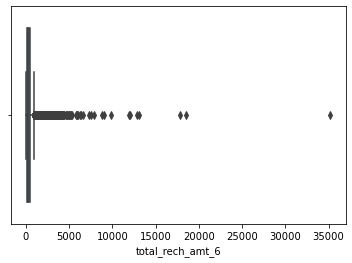

In [41]:
sns.boxplot(data['total_rech_amt_6'])

In [42]:
data['total_rech_amt_6'].describe()

count    99999.000000
mean       327.514615
std        398.019701
min          0.000000
25%        109.000000
50%        230.000000
75%        437.500000
max      35190.000000
Name: total_rech_amt_6, dtype: float64

75% is 437 and we can see max amount as 35190.Dropping Outliers

In [43]:
def drop_outliers(x,col):
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
        return x   

data = drop_outliers(data,'total_rech_amt_6')

In [44]:
data['total_rech_amt_6'].describe()

count    99954.000000
mean       324.370590
std        350.987971
min          0.000000
25%        109.000000
50%        229.000000
75%        437.000000
max       4041.000000
Name: total_rech_amt_6, dtype: float64

<AxesSubplot:xlabel='total_rech_amt_7'>

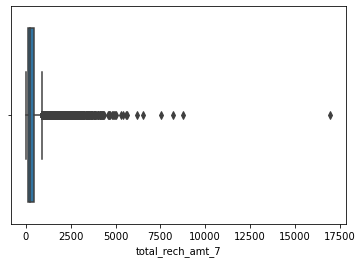

In [45]:
sns.boxplot(data['total_rech_amt_7'])

In [46]:
data['total_rech_amt_7'].describe()

count    99954.000000
mean       320.789353
std        366.452889
min          0.000000
25%        100.000000
50%        220.000000
75%        428.000000
max      16984.000000
Name: total_rech_amt_7, dtype: float64

for total_rech_amt_7 also we can see max value as 16984. Dropping outliers

In [47]:
data = drop_outliers(data,'total_rech_amt_7')

In [48]:
data['total_rech_amt_7'].describe()

count    99925.000000
mean       319.265079
std        352.916303
min          0.000000
25%        100.000000
50%        220.000000
75%        428.000000
max       4082.000000
Name: total_rech_amt_7, dtype: float64

<AxesSubplot:xlabel='total_rech_amt_8'>

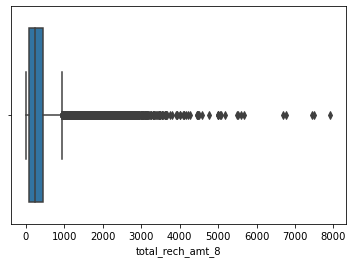

In [49]:
sns.boxplot(data['total_rech_amt_8'])

In [50]:
data = drop_outliers(data,'total_rech_amt_8')

In [51]:
data['total_rech_amt_8'].describe()

count    99898.000000
mean       319.574816
std        351.771903
min          0.000000
25%         90.000000
50%        225.000000
75%        434.000000
max       4085.000000
Name: total_rech_amt_8, dtype: float64

### Filtering High valued customers

In [52]:
## We dont have column for data recharge amounts. Hence calculating it by mulitplying recharged data with average recharge amount

data['total_data_rech_6'] = data.total_rech_data_6 * data.av_rech_amt_data_6
data['total_data_rech_7'] = data.total_rech_data_7 * data.av_rech_amt_data_7
data['rech_amt_6'] = data['total_data_rech_7'] + data['total_data_rech_6']
data['rech_amt_7'] = data['total_rech_amt_7'] + data['total_data_rech_7']

In [53]:
data['avg_rech_amt_goodphase'] = (data['rech_amt_6']+data['rech_amt_7'])/2

In [54]:
data.drop(['total_data_rech_6','total_data_rech_7','rech_amt_6','rech_amt_7','total_data_rech_7','total_data_rech_6'],axis=1,inplace=True)

In [55]:
# retain only those customers who have recharged their mobiles with more than or equal to 70th percentile amount
hvc = data.loc[data.avg_rech_amt_goodphase >= data.avg_rech_amt_goodphase.quantile(0.7), :]
hvc = hvc.reset_index(drop=True)
hvc.shape

(29981, 179)

### Tag Churn Customers

In [56]:
def Churn(x):
    
    if (x['total_ic_mou_9']== 0) & (x['total_og_mou_9']==0) & (x['vol_2g_mb_9']== 0) & (x['vol_3g_mb_9']==0):
        return 1
    else:
        return 0
   

hvc['churn'] = [Churn(x) for i,x in hvc.iterrows()]

In [57]:
hvc['churn'].value_counts()

0    27799
1     2182
Name: churn, dtype: int64

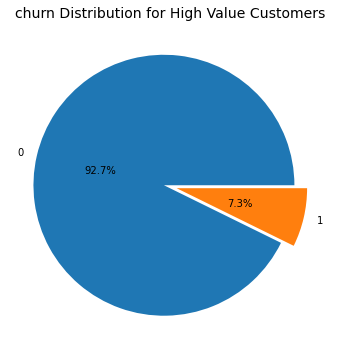

In [58]:
def pie_chart(ds,col):
    column = ds[col].value_counts(normalize=True)
    pie, ax = plt.subplots(figsize=[10,6])
    labels = column.keys()
    plt.pie(x=column, autopct="%.1f%%", labels=labels, pctdistance=0.5,explode=[0.05]*2)
    plt.title(col + " Distribution for High Value Customers", fontsize=14);
    

pie_chart(hvc,'churn')

#### Calculating Difference between Average revenue per user in Action Phase and Good Phase

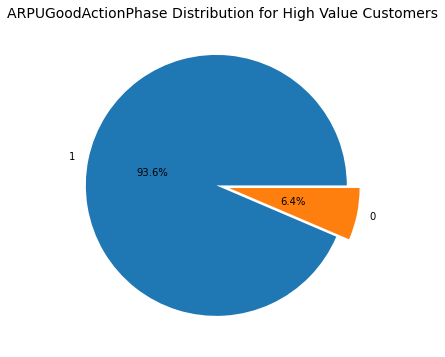

In [59]:
def ChurnPred(x):
    amt = (x['arpu_8']- (x['arpu_7']+x['arpu_6']))
    if(amt <= 0):
        return 1
    else:
        return 0
        
hvc['ARPUGoodActionPhase'] = [ChurnPred(x) for i,x in hvc.iterrows()]

pie_chart(hvc,'ARPUGoodActionPhase')

96.1% customers avergage revenue per user has decreased in action phase compared to good phase. 


#### Deleting columns from Churn Phase

In [60]:
cols = [ col for col in hvc.columns if '9' in col ]
cols

['arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'last_day_rch_amt_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9']

In [61]:
hvc.drop(labels=cols,axis=1,inplace=True)

In [62]:
hvc.shape

(29981, 138)

### Checking MultiCollinearity

In [63]:
hvc.corr().loc[:,"churn"].abs().sort_values(ascending=False)

churn                     1.000000
total_rech_amt_8          0.168763
arpu_8                    0.163399
total_ic_mou_8            0.153401
loc_ic_mou_8              0.148899
loc_ic_t2m_mou_8          0.139870
av_rech_amt_data_8        0.139489
max_rech_data_8           0.136421
loc_og_mou_8              0.128606
loc_og_t2m_mou_8          0.127991
max_rech_amt_8            0.126266
last_day_rch_amt_8        0.124738
total_rech_num_8          0.124054
total_rech_data_8         0.115770
total_og_mou_8            0.114189
aon                       0.103964
monthly_2g_8              0.102298
aug_vbc_3g                0.088896
std_og_mou_6              0.086997
sachet_2g_8               0.085580
vol_3g_mb_8               0.085432
offnet_mou_8              0.082131
roam_og_mou_7             0.080497
loc_ic_mou_7              0.078798
loc_ic_t2t_mou_8          0.078787
vol_2g_mb_8               0.077364
monthly_2g_7              0.077196
loc_ic_t2f_mou_8          0.076307
loc_ic_t2m_mou_7    

In [64]:
hvc_corr =  hvc.corr(method='pearson')
corr=hvc_corr.where(np.triu(np.ones(hvc_corr.shape),k=1).astype(np.bool))
corr_df=corr.unstack().reset_index()

corr_df.columns = ['Variable1','Variable2','CORRELATION']
corr_df['CORR_ABS'] = abs(corr_df['CORRELATION'])
corr_df.sort_values('CORR_ABS', ascending=False).head(30)

,Variable1,Variable2,CORRELATION,CORR_ABS
12973,total_rech_amt_6,arpu_6,0.957196,0.957196
13251,total_rech_amt_8,arpu_8,0.953942,0.953942
13112,total_rech_amt_7,arpu_7,0.939153,0.939153
10966,total_ic_mou_6,loc_ic_mou_6,0.905852,0.905852
17079,sachet_2g_8,total_rech_data_8,0.903729,0.903729
16801,sachet_2g_6,total_rech_data_6,0.902680,0.902680
16940,sachet_2g_7,total_rech_data_7,0.902029,0.902029
11244,total_ic_mou_8,loc_ic_mou_8,0.901598,0.901598
11105,total_ic_mou_7,loc_ic_mou_7,0.892170,0.892170
4560,std_og_t2t_mou_8,onnet_mou_8,0.866868,0.866868


In [65]:
##corrcols = ['total_rech_amt_8','total_rech_amt_6','total_rech_amt_7','isd_og_mou_7','isd_og_mou_6',
           #'sachet_2g_7','sachet_2g_6','sachet_2g_8','std_og_t2t_mou_7','std_og_t2t_mou_8','std_og_t2t_mou_6','loc_ic_t2m_mou_8',
           #'std_ic_t2m_mou_8','loc_ic_t2m_mou_6','loc_ic_t2m_mou_7','loc_ic_mou_6',
           #'loc_ic_mou_7',
           #'loc_ic_mou_8',
           #'std_og_t2t_mou_8',
           #'std_og_t2m_mou_7',
           #'std_og_t2m_mou_8',
           #'std_og_mou_8',
           #'std_og_mou_7',
           #'std_og_t2m_mou_6','std_ic_t2m_mou_7']


corrcols = ['total_rech_amt_8',
            'total_rech_amt_6',
            'total_rech_amt_7',
            'isd_og_mou_7',
            'isd_og_mou_6',
            'sachet_2g_7',
            'sachet_2g_6',
            'sachet_2g_8',
            'total_og_mou_6',
            'onnet_mou_8',
            'onnet_mou_7',
            'onnet_mou_6',
            'offnet_mou_8',
            'offnet_mou_7',
            'offnet_mou_6',
            'total_og_mou_7','total_og_mou_8',
            'loc_og_mou_6','loc_og_mou_7','loc_og_mou_8',
           'std_og_mou_6','std_og_mou_7','std_og_mou_8',
           'total_ic_mou_6','total_ic_mou_7','total_ic_mou_8',
           'loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8',
           'std_ic_mou_6','std_ic_mou_7','std_ic_mou_8']

hvc.drop(labels=corrcols,axis=1,inplace=True)

### EDA and Deriving new Features

#### Comparing calls made to customer care in action phase and good phase

In [66]:
t2ccalls = hvc['loc_og_t2c_mou_8'] - (hvc['loc_og_t2c_mou_6']+hvc['loc_og_t2c_mou_6'])

In [67]:
hvc['t2calls'] = t2ccalls.apply(lambda x: 1 if x>=0 else 0)

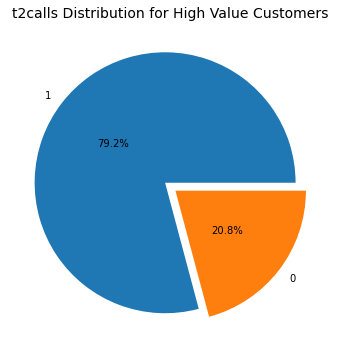

In [68]:
pie_chart(hvc,'t2calls')

#### Analyzing Age on Network

<AxesSubplot:xlabel='aon'>

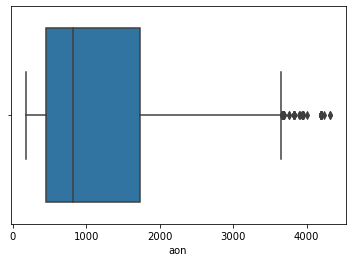

In [69]:
sns.boxplot(hvc['aon'])

Creating a new column to convert age on network from days to months

In [70]:
hvc['tenure_in_months'] = hvc['aon']/30

<AxesSubplot:xlabel='tenure_in_months'>

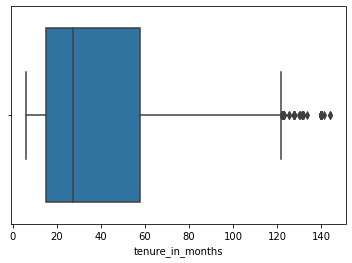

In [71]:
sns.boxplot(hvc['tenure_in_months'])

Binning the tenure

In [72]:
hvc['tenure_in_months_bin'] = pd.cut(hvc['tenure_in_months'], [0, 6, 12, 24, 60, 61], labels=[ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above'])
hvc['tenure_in_months_bin'].value_counts()

2-5 Yrs            9271
1-2 Yrs            8082
6-12 Months        5385
5 Yrs and above     148
0-6 Months           22
Name: tenure_in_months_bin, dtype: int64

<AxesSubplot:xlabel='tenure_in_months_bin', ylabel='count'>

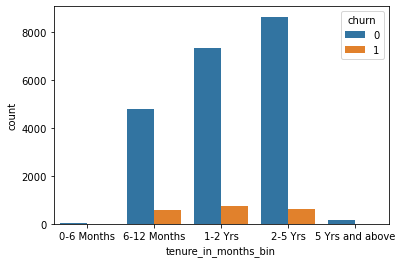

In [73]:
sns.countplot(hvc['tenure_in_months_bin'], hue=hvc['churn'])


Customers who have been longer with network churn less

In [74]:
hvc.drop('aon',axis=1, inplace=True)

#### Calls made to customer care vs churn rate in action phase

<AxesSubplot:xlabel='churn', ylabel='loc_og_t2c_mou_8'>

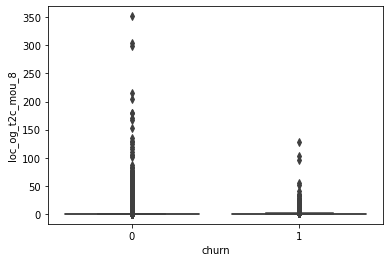

In [75]:
sns.boxplot(y = hvc['loc_og_t2c_mou_8'],x = hvc['churn'])

#### Total number of recharges in Action Phase vs Churn

In [76]:
cols = [ col for col in hvc.columns if 'num' in col ]
cols

['mobile_number', 'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8']

In [77]:
hvc['total_rech_num_bin_8']=pd.cut(hvc['total_rech_num_8'],[-1,0,10,25,1000],labels=["No_Recharge","<=10_Recharges","10-25_Recharges",">25_Recharges"])

In [78]:
hvc['total_rech_num_bin_8'].value_counts()

<=10_Recharges     20005
10-25_Recharges     7755
>25_Recharges       1741
No_Recharge          480
Name: total_rech_num_bin_8, dtype: int64

<AxesSubplot:xlabel='total_rech_num_bin_8', ylabel='count'>

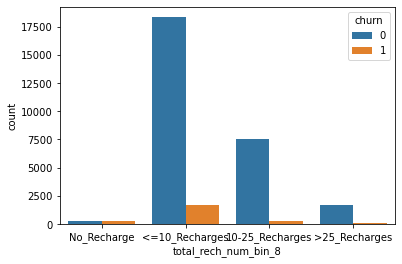

In [79]:
sns.countplot(hvc['total_rech_num_bin_8'], hue=hvc['churn'])

In [80]:
hvc.drop('total_rech_num_8',axis=1, inplace=True)

In [81]:
hvc['loc_og_t2c_mou_8'].describe()

count    29981.000000
mean         1.775983
std          7.202250
min          0.000000
25%          0.000000
50%          0.000000
75%          0.250000
max        351.830000
Name: loc_og_t2c_mou_8, dtype: float64

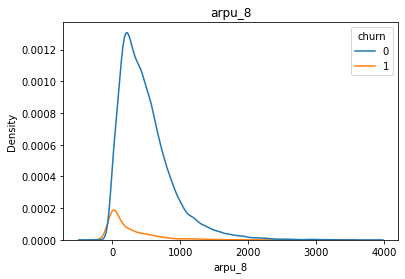

In [82]:
sns.kdeplot(x='arpu_8',data=hvc,hue="churn")
plt.title("arpu_8")
plt.show()

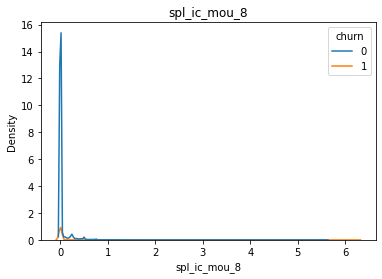

In [83]:
sns.kdeplot(data=hvc, x="spl_ic_mou_8", hue="churn")
plt.title("spl_ic_mou_8")
plt.show()

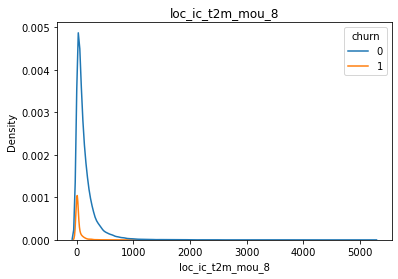

In [84]:
sns.kdeplot(data=hvc, x="loc_ic_t2m_mou_8", hue="churn")
plt.title("loc_ic_t2m_mou_8")
plt.show()

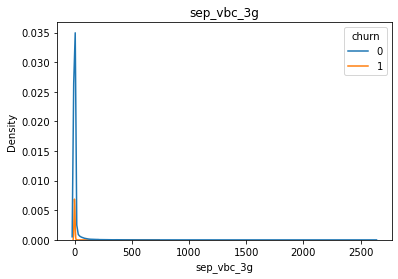

In [85]:
sns.kdeplot(data=hvc, x="sep_vbc_3g", hue="churn")
plt.title("sep_vbc_3g")
plt.show()

### Handling Categorical Variables

In [86]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy = pd.get_dummies(hvc[['total_rech_num_bin_8','tenure_in_months_bin']], drop_first=True)
dummy.head()

,total_rech_num_bin_8_<=10_Recharges,total_rech_num_bin_8_10-25_Recharges,total_rech_num_bin_8_>25_Recharges,tenure_in_months_bin_6-12 Months,tenure_in_months_bin_1-2 Yrs,tenure_in_months_bin_2-5 Yrs,tenure_in_months_bin_5 Yrs and above
0,1,0,0,0,0,1,0
1,0,1,0,0,0,1,0
2,1,0,0,0,0,1,0
3,0,1,0,1,0,0,0
4,0,1,0,1,0,0,0


In [87]:
hvc = pd.concat([hvc,dummy],axis=1)

In [88]:
hvc.drop(['total_rech_num_bin_8','tenure_in_months_bin'],axis=1,inplace=True)

In [89]:
hvc.shape

(29981, 113)

### Train Test Split

In [90]:
X = hvc.drop(['churn'],axis=1)
y =hvc['churn']

In [91]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)
print("Dimension of X_train:", X_train.shape)
print("Dimension of X_test:", X_test.shape)

Dimension of X_train: (20986, 112)
Dimension of X_test: (8995, 112)


#### Scaling the numerical columns

In [92]:
num_col = X_train.select_dtypes(include = ['int64','float64']).columns.tolist()


scaler = MinMaxScaler()
X_train[num_col] = scaler.fit_transform(X_train[num_col])

In [93]:
X_train.shape

(20986, 112)

### Handling Class Imbalance

In [94]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_sm,y_train_sm = sm.fit_resample(X_train,y_train)

In [95]:
X_train_sm.shape

(38966, 112)

### Logistic Regression

In [96]:
logreg = LogisticRegression()
rfe=RFE(logreg,30)
rfe.fit(X_train_sm, y_train_sm)

RFE(estimator=LogisticRegression(), n_features_to_select=30)

In [97]:
col = X_train_sm.columns[rfe.support_]

In [98]:
col

Index(['arpu_7', 'arpu_8', 'roam_og_mou_8', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_7',
       'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'isd_og_mou_8',
       'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_7',
       'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_8',
       'std_ic_t2t_mou_6', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8',
       'spl_ic_mou_8', 'last_day_rch_amt_8', 'total_rech_data_8',
       'av_rech_amt_data_7', 'av_rech_amt_data_8', 'vol_2g_mb_8',
       'monthly_2g_8', 'sachet_3g_7', 'aug_vbc_3g', 'sep_vbc_3g',
       'avg_rech_amt_goodphase'],
      dtype='object')

In [99]:
import statsmodels.api as sm 
X_train_model = sm.add_constant(X_train_sm[col])
logm2 = sm.GLM(y_train_sm,X_train_model, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38966
Model:                            GLM   Df Residuals:                    38935
Model Family:                Binomial   Df Model:                           30
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15777.
Date:                Wed, 05 Jan 2022   Deviance:                       31554.
Time:                        13:56:24   Pearson chi2:                 8.84e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.5184      0.103      5.025      0.000       0.316       0.721
arpu_7                     3.6843      0.358     10.284      0.000       2.982       4.386
arpu_8                    -0.8212      0.434     -1.892      0.059      -1.672       0.030
roam_og_mou_8              5.5107      0.583      9.445      0.000       4.367       6.654
loc_og_t2t_mou_8         -17.6217      2.108     -8.360      0.000     -21.753     -13.491
loc_og_t2m_mou_8         -12.7005      0.979    -12.968      0.000     -14.620     -10.781
std_og_t2t_mou_8          -5.8158      0.460    -12.642      0.000      -6.717      -4.914
std_og_t2m_mou_7           6.2908      0.585     10.746      0.000       5.143       7.438
std_og_t2m_mou_8         -11.1955      0.727    -15.410      0.000     -12.619      -9.772
std_og_t2f_mou_8         -29.2890      3.800     -7.709      0.000     -36.736     -21.842
isd_og_mou_8               4.6308      0.896      5.166      0.000       2.874       6.388
loc_ic_t2t_mou_6          13.4631      1.320     10.196      0.000      10.875      16.051
loc_ic_t2t_mou_8         -17.8788      1.544    -11.579      0.000     -20.905     -14.852
loc_ic_t2m_mou_7          15.4834      0.838     18.467      0.000      13.840      17.127
loc_ic_t2m_mou_8         -38.9966      1.508    -25.864      0.000     -41.952     -36.041
loc_ic_t2f_mou_6          -5.0421      1.357     -3.715      0.000      -7.702      -2.382
loc_ic_t2f_mou_8         -16.8529      1.996     -8.443      0.000     -20.765     -12.941
std_ic_t2t_mou_6           6.4567      0.860      7.507      0.000       4.771       8.143
std_ic_t2t_mou_8          -7.5940      1.271     -5.973      0.000     -10.086      -5.102
std_ic_t2m_mou_8          -7.7160      1.378     -5.599      0.000     -10.417      -5.015
spl_ic_mou_8             -39.6070      1.893    -20.923      0.000     -43.317     -35.897
last_day_rch_amt_8        -9.6585      0.376    -25.697      0.000     -10.395      -8.922
total_rech_data_8        -14.1136      0.632    -22.325      0.000     -15.353     -12.875
av_rech_amt_data_7        -1.7714      0.508     -3.486      0.000      -2.767      -0.775
av_rech_amt_data_8        -5.9548      0.586    -10.157      0.000      -7.104      -4.806
vol_2g_mb_8               -5.8424      0.897     -6.511      0.000      -7.601      -4.084
monthly_2g_8              -6.0132      0.309    -19.490      0.000      -6.618      -5.409
sachet_3g_7                4.4382      0.594      7.473      0.000       3.274       5.602
aug_vbc_3g                -8.8284      0.980     -9.012      0.000     -10.748      -6.908
sep_vbc_3g               -36.6405      3.699     -9.904      0.000     -43.891     -29.390
avg_rech_amt_goodphase     5.0913      0.884      5.757      0.000       3.358  

In [100]:
vif = pd.DataFrame()
vif['Features'] = X_train_model[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_model[col].values, i) for i in range(X_train_model[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,arpu_8,25.99
0,arpu_7,14.59
13,loc_ic_t2m_mou_8,4.34
12,loc_ic_t2m_mou_7,4.02
23,av_rech_amt_data_8,3.89
22,av_rech_amt_data_7,3.88
7,std_og_t2m_mou_8,3.22
6,std_og_t2m_mou_7,2.84
29,avg_rech_amt_goodphase,2.72
4,loc_og_t2m_mou_8,2.53


In [101]:
col = col.drop('arpu_8')

In [102]:
X_train_model = sm.add_constant(X_train_model[col])
logm2 = sm.GLM(y_train_sm,X_train_model[col], family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38966
Model:                            GLM   Df Residuals:                    38937
Model Family:                Binomial   Df Model:                           28
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15792.
Date:                Wed, 05 Jan 2022   Deviance:                       31583.
Time:                        13:56:25   Pearson chi2:                 9.50e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
arpu_7                     5.0176      0.089     56.201      0.000       4.843       5.193
roam_og_mou_8              4.3330      0.497      8.711      0.000       3.358       5.308
loc_og_t2t_mou_8         -19.4443      2.124     -9.155      0.000     -23.607     -15.282
loc_og_t2m_mou_8         -14.3244      0.923    -15.521      0.000     -16.133     -12.516
std_og_t2t_mou_8          -6.9398      0.367    -18.932      0.000      -7.658      -6.221
std_og_t2m_mou_7           5.5904      0.542     10.307      0.000       4.527       6.654
std_og_t2m_mou_8         -11.6765      0.635    -18.379      0.000     -12.922     -10.431
std_og_t2f_mou_8         -30.0849      3.838     -7.839      0.000     -37.607     -22.563
isd_og_mou_8               3.5448      0.868      4.085      0.000       1.844       5.246
loc_ic_t2t_mou_6          13.7104      1.323     10.366      0.000      11.118      16.303
loc_ic_t2t_mou_8         -18.2601      1.548    -11.796      0.000     -21.294     -15.226
loc_ic_t2m_mou_7          15.2151      0.832     18.294      0.000      13.585      16.845
loc_ic_t2m_mou_8         -38.7463      1.497    -25.883      0.000     -41.680     -35.812
loc_ic_t2f_mou_6          -4.6987      1.343     -3.500      0.000      -7.330      -2.067
loc_ic_t2f_mou_8         -17.4329      2.001     -8.714      0.000     -21.354     -13.512
std_ic_t2t_mou_6           6.3379      0.864      7.338      0.000       4.645       8.031
std_ic_t2t_mou_8          -7.9309      1.283     -6.180      0.000     -10.446      -5.416
std_ic_t2m_mou_8          -7.9074      1.385     -5.709      0.000     -10.622      -5.193
spl_ic_mou_8             -39.3581      1.888    -20.843      0.000     -43.059     -35.657
last_day_rch_amt_8        -9.8551      0.370    -26.621      0.000     -10.581      -9.130
total_rech_data_8        -13.4793      0.614    -21.939      0.000     -14.683     -12.275
av_rech_amt_data_7        -1.5319      0.507     -3.020      0.003      -2.526      -0.538
av_rech_amt_data_8        -6.4346      0.553    -11.643      0.000      -7.518      -5.351
vol_2g_mb_8               -5.8428      0.893     -6.545      0.000      -7.593      -4.093
monthly_2g_8              -5.9165      0.308    -19.206      0.000      -6.520      -5.313
sachet_3g_7                4.4812      0.591      7.582      0.000       3.323       5.640
aug_vbc_3g                -9.0623      0.976     -9.282      0.000     -10.976      -7.149
sep_vbc_3g               -37.6301      3.744    -10.051      0.000     -44.968     -30.292
avg_rech_amt_goodphase     4.1330      0.860      4.806      0.000       2.448       5.818
==========================================================================================
"""

In [103]:
vif = pd.DataFrame()
vif['Features'] = X_train_model[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_model[col].values, i) for i in range(X_train_model[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,arpu_7,4.41
12,loc_ic_t2m_mou_8,4.24
11,loc_ic_t2m_mou_7,3.96
21,av_rech_amt_data_7,3.81
22,av_rech_amt_data_8,3.36
28,avg_rech_amt_goodphase,2.72
5,std_og_t2m_mou_7,2.67
10,loc_ic_t2t_mou_8,2.42
6,std_og_t2m_mou_8,2.26
9,loc_ic_t2t_mou_6,2.26


In [104]:
def predict(res,X_data,y_data,intial_cutoff,test_data):
    y_data_pred = res.predict(X_data)
    
    y_data_pred_final = pd.merge(pd.DataFrame({'Churn':y_data}),pd.DataFrame({'Churn_Prob':y_data_pred}),left_index=True, right_index=True)
    y_data_pred_final['predicted'] = y_data_pred_final.Churn_Prob.map(lambda x: 1 if x > intial_cutoff else 0)
    print_l('Dataframe with the predicted values',y_data_pred_final.head())
    
    
    accuracy_s, sensitivity_s, specificity_s , false_positive_s , positive_predictive_s, negative_predictive_s = calculate_s(y_data_pred_final,'predicted',intial_cutoff)
    
    if test_data == 'N':
        print('')
    
        fpr, tpr, thresholds = metrics.roc_curve( y_data_pred_final.Churn, y_data_pred_final.Churn_Prob, drop_intermediate = False )
        draw_roc(y_data_pred_final.Churn, y_data_pred_final.Churn_Prob)
    
        # Let's create columns with different probability cutoffs 
        numbers = [float(x)/10 for x in range(10)]
        for i in numbers:
            y_data_pred_final[i] = y_data_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
    
        print('')
        print('')
        print('')
        print_l('Dataframe with different Cutoff Values ',y_data_pred_final.head())
    
        cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])

        num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
        for i in num:
        
            accuracy_s, sensitivity_s, specificity_s , false_positive_s , positive_predictive_s, negative_predictive_s = calculate_s(y_data_pred_final,i,i)
            cutoff_df.loc[i] =[ i ,accuracy_s,sensitivity_s,specificity_s]
    
        print("\n\n-----------------------------------------------------------------------------------------")
        print('Print the Probaility/Senstivity.Specificity and the Accuracy')
        print("-----------------------------------------------------------------------------------------\n")
    
        print(cutoff_df)
        
        print("\n\n-----------------------------------------------------------------------------------------")
        print('Plot Senstivity.Specificity and probability Vs Probability Cut off  ')
        print("-----------------------------------------------------------------------------------------\n")
        cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
        plt.show()
        
        print("\n\n-----------------------------------------------------------------------------------------")
        print('Plot Recall/Precision')
        print("-----------------------------------------------------------------------------------------\n")
        
        p, r, thresholds = precision_recall_curve(y_data_pred_final.Churn, y_data_pred_final.Churn_Prob)
        plt.plot(thresholds, p[:-1], "g-")
        plt.plot(thresholds, r[:-1], "r-")
        plt.show()
    
    
def print_l(print_value,print_df):
    print("-----------------------------------------------------------------------------------------")
    print("                         ",print_value)
    print("-----------------------------------------------------------------------------------------\n")
    print(print_df,'\n')

    
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

def calculate_s(y_data_pred_final,pred_col,cutoff_v):
    
    confusion_mx_p = metrics.confusion_matrix(y_data_pred_final.Churn, y_data_pred_final[pred_col] )
    print_l('Confusion Matrix - For Cutoff {0}'.format(cutoff_v),confusion_mx_p)
    
    TP = confusion_mx_p[1,1] # true positive 
    TN = confusion_mx_p[0,0] # true negatives
    FP = confusion_mx_p[0,1] # false positives
    FN = confusion_mx_p[1,0] # false negatives
    
    accuracy_s = metrics.accuracy_score(y_data_pred_final.Churn, y_data_pred_final[pred_col]) * 100
    print('* Accuracy Score - {0}'.format(accuracy_s),'')
    sensitivity_s = round(TP/(TP+FN),2)*100
    print('* Sensitivity - {0}'.format(sensitivity_s),'')
    specificity_s = round(TN/(TN+FP),2)*100
    print('* Specificity - {0}'.format(specificity_s),'')
    false_positive_s = round(FP/(TN+FP),2)*100
    print('* False Positive - {0}'.format(false_positive_s),'')
    positive_predictive_s = round(TP/(TP+FP),2)*100
    print('* Positive Predictive Value - {0}'.format(positive_predictive_s),'')
    negative_predictive_s = round(TN/(TN+FN),2)*100
    print('* Negative Predictive Value - {0}'.format(negative_predictive_s),'')
    return accuracy_s, sensitivity_s, specificity_s , false_positive_s , positive_predictive_s, negative_predictive_s

-----------------------------------------------------------------------------------------
                          Dataframe with the predicted values
-----------------------------------------------------------------------------------------

   Churn  Churn_Prob  predicted
0      0    0.429958          0
1      0    0.000123          0
2      0    0.019992          0
3      0    0.191636          0
4      0    0.103011          0 

-----------------------------------------------------------------------------------------
                          Confusion Matrix - For Cutoff 0.5
-----------------------------------------------------------------------------------------

[[15516  3967]
 [ 2858 16625]] 

* Accuracy Score - 82.48473027767798 
* Sensitivity - 85.0 
* Specificity - 80.0 
* False Positive - 20.0 
* Positive Predictive Value - 81.0 
* Negative Predictive Value - 84.0 



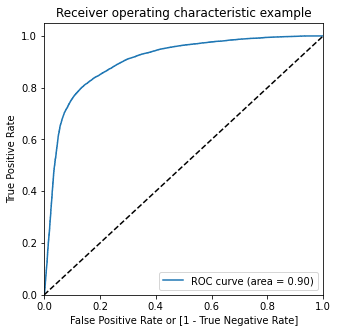




-----------------------------------------------------------------------------------------
                          Dataframe with different Cutoff Values 
-----------------------------------------------------------------------------------------

   Churn  Churn_Prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  \
0      0    0.429958          0    1    1    1    1    1    0    0    0    0   
1      0    0.000123          0    1    0    0    0    0    0    0    0    0   
2      0    0.019992          0    1    0    0    0    0    0    0    0    0   
3      0    0.191636          0    1    1    0    0    0    0    0    0    0   
4      0    0.103011          0    1    1    0    0    0    0    0    0    0   

   0.9  
0    0  
1    0  
2    0  
3    0  
4    0   

-----------------------------------------------------------------------------------------
                          Confusion Matrix - For Cutoff 0.0
---------------------------------------------------------------

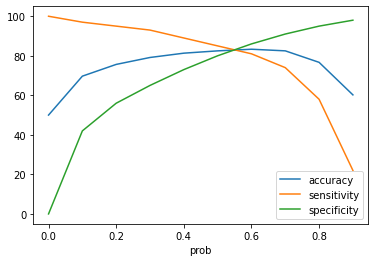



-----------------------------------------------------------------------------------------
Plot Recall/Precision
-----------------------------------------------------------------------------------------



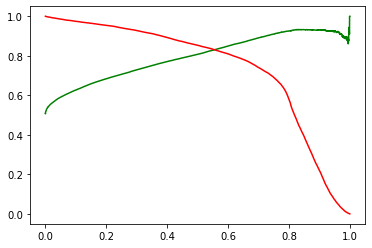

In [105]:
#y_train_pred = res.predict(X_train_sm[col])
#y_train_pred[:10]
X_train_model = X_train_model[col]
predict(res,X_train_model,y_train_sm,0.5,'N')

In [106]:
X_train_model.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38966 entries, 0 to 38965
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   arpu_7                  38966 non-null  float64
 1   roam_og_mou_8           38966 non-null  float64
 2   loc_og_t2t_mou_8        38966 non-null  float64
 3   loc_og_t2m_mou_8        38966 non-null  float64
 4   std_og_t2t_mou_8        38966 non-null  float64
 5   std_og_t2m_mou_7        38966 non-null  float64
 6   std_og_t2m_mou_8        38966 non-null  float64
 7   std_og_t2f_mou_8        38966 non-null  float64
 8   isd_og_mou_8            38966 non-null  float64
 9   loc_ic_t2t_mou_6        38966 non-null  float64
 10  loc_ic_t2t_mou_8        38966 non-null  float64
 11  loc_ic_t2m_mou_7        38966 non-null  float64
 12  loc_ic_t2m_mou_8        38966 non-null  float64
 13  loc_ic_t2f_mou_6        38966 non-null  float64
 14  loc_ic_t2f_mou_8        38966 non-null

In [107]:
predict(res,X_train_model,y_train_sm,0.5,'Y')

-----------------------------------------------------------------------------------------
                          Dataframe with the predicted values
-----------------------------------------------------------------------------------------

   Churn  Churn_Prob  predicted
0      0    0.429958          0
1      0    0.000123          0
2      0    0.019992          0
3      0    0.191636          0
4      0    0.103011          0 

-----------------------------------------------------------------------------------------
                          Confusion Matrix - For Cutoff 0.5
-----------------------------------------------------------------------------------------

[[15516  3967]
 [ 2858 16625]] 

* Accuracy Score - 82.48473027767798 
* Sensitivity - 85.0 
* Specificity - 80.0 
* False Positive - 20.0 
* Positive Predictive Value - 81.0 
* Negative Predictive Value - 84.0 


#### Top features

In [108]:
res.params.abs().sort_values(ascending=False)

spl_ic_mou_8              39.358070
loc_ic_t2m_mou_8          38.746343
sep_vbc_3g                37.630093
std_og_t2f_mou_8          30.084889
loc_og_t2t_mou_8          19.444338
loc_ic_t2t_mou_8          18.260084
loc_ic_t2f_mou_8          17.432894
loc_ic_t2m_mou_7          15.215073
loc_og_t2m_mou_8          14.324372
loc_ic_t2t_mou_6          13.710367
total_rech_data_8         13.479250
std_og_t2m_mou_8          11.676507
last_day_rch_amt_8         9.855117
aug_vbc_3g                 9.062326
std_ic_t2t_mou_8           7.930950
std_ic_t2m_mou_8           7.907402
std_og_t2t_mou_8           6.939814
av_rech_amt_data_8         6.434605
std_ic_t2t_mou_6           6.337866
monthly_2g_8               5.916515
vol_2g_mb_8                5.842821
std_og_t2m_mou_7           5.590435
arpu_7                     5.017618
loc_ic_t2f_mou_6           4.698658
sachet_3g_7                4.481166
roam_og_mou_8              4.333046
avg_rech_amt_goodphase     4.132990
isd_og_mou_8               3

<b> Inference - Company needs to look into the incoming and outgoing calls which user makes in action phase within the same operator both mobile and fixed line.

Company also needs to look into monthly usage of local incoming calls from other operator mobile in action phase

Company needs to revisit its charges for other operator calls<b>


#### Model Evaluation

In [109]:
X_test[num_col] = scaler.transform(X_test[num_col])
X_test.head()

,mobile_number,arpu_6,arpu_7,arpu_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_goodphase,ARPUGoodActionPhase,t2calls,tenure_in_months,total_rech_num_bin_8_<=10_Recharges,total_rech_num_bin_8_10-25_Recharges,total_rech_num_bin_8_>25_Recharges,tenure_in_months_bin_6-12 Months,tenure_in_months_bin_1-2 Yrs,tenure_in_months_bin_2-5 Yrs,tenure_in_months_bin_5 Yrs and above
17475,0.037798,0.190297,0.297972,0.142200,0.0,0.0,0.0,0.0,0.0,0.0,0.002046,0.000811,0.001614,0.008455,0.004395,0.006418,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.002026,0.001146,0.004065,0.0,0.0,0.0,0.002778,0.001459,0.007664,0.017804,0.010636,0.010031,0.000554,0.000164,0.000000,0.0000,0.000000,0.0,0.003849,0.00000,0.001275,0.000000,0.015210,0.000000,0.0,0.0,0.076923,0.000063,0.0,0.000000,0.0,0.000000,0.000000,0.040,0.036232,0.073333,0.049677,0.070032,0.023810,0.015238,0.014715,0.016393,0.018519,0.050000,0.099035,0.099035,0.099035,0.045029,0.040903,0.065595,0.018038,0.028012,0.011726,0.029215,0.033987,0.034209,0.25,0.2,0.2,0.0,0.0,0.0,0.0,0.0,0.00000,0.086964,0.136540,0.127248,0.008276,0.000924,1.0,1.0,0.021251,1,0,0,1,0,0,0
27454,0.962913,0.182453,0.299100,0.123990,0.0,0.0,0.0,0.0,0.0,0.0,0.000215,0.000542,0.000124,0.004330,0.008242,0.003042,0.000000,0.002590,0.001142,0.000000,0.009408,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.004763,0.000000,0.0,0.0,0.0,0.000000,0.002198,0.001214,0.005833,0.009742,0.011169,0.000822,0.004928,0.000837,0.0000,0.000000,0.0,0.000133,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000262,0.0,0.000000,0.000000,0.016,0.028986,0.059524,0.049677,0.070032,0.059524,0.052381,0.000000,0.016393,0.018519,0.016667,0.080386,0.099035,0.099035,0.036550,0.040903,0.049518,0.000103,0.004635,0.001223,0.031770,0.027141,0.030200,0.25,0.2,0.2,0.0,0.0,0.0,0.0,0.0,0.00000,0.011928,0.019122,0.012015,0.000000,0.001262,1.0,1.0,0.156001,1,0,0,0,0,1,0
17414,0.694399,0.220695,0.332108,0.171375,0.0,0.0,0.0,0.0,0.0,0.0,0.005708,0.006852,0.005358,0.036970,0.036018,0.024487,0.032063,0.003384,0.014787,0.000000,0.000000,0.0,0.000619,0.0,0.0,0.000000,0.000000,0.00000,0.002544,0.000569,0.000871,0.0,0.001636,0.000000,0.000000,0.0,0.0,0.0,0.008814,0.016770,0.010432,0.032817,0.029324,0.021447,0.012411,0.043122,0.004432,0.0000,0.000665,0.0,0.000000,0.00047,0.000000,0.001362,0.002148,0.002373,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.064,0.036232,0.073333,0.049677,0.113688,0.057143,0.

In [110]:
X_test = X_test[col]
predict(res,X_test[col],y_test,0.5,'Y')

-----------------------------------------------------------------------------------------
                          Dataframe with the predicted values
-----------------------------------------------------------------------------------------

       Churn  Churn_Prob  predicted
17475      0    0.003511          0
27454      0    0.316558          0
17414      0    0.124386          0
17712      0    0.621898          1
17929      0    0.156399          0 

-----------------------------------------------------------------------------------------
                          Confusion Matrix - For Cutoff 0.5
-----------------------------------------------------------------------------------------

[[6545 1771]
 [ 126  553]] 

* Accuracy Score - 78.91050583657588 
* Sensitivity - 81.0 
* Specificity - 79.0 
* False Positive - 21.0 
* Positive Predictive Value - 24.0 
* Negative Predictive Value - 98.0 


## Logistic Regression with PCA

In [111]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)
print("Dimension of X_train:", X_train.shape)
print("Dimension of X_test:", X_test.shape)

num_col = X_train.select_dtypes(include = ['int64','float64']).columns.tolist()

scaler = MinMaxScaler()
X_train[num_col] = scaler.fit_transform(X_train[num_col])

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_sm,y_train_sm = sm.fit_resample(X_train,y_train)

Dimension of X_train: (20986, 112)
Dimension of X_test: (8995, 112)


In [112]:
from sklearn.decomposition import PCA,IncrementalPCA
pca = PCA(random_state=42)

# applying PCA on train data
pca.fit(X_train_sm)

PCA(random_state=42)

In [113]:
X_train_sm_pca=pca.fit_transform(X_train_sm)
print("Dimension of X_train_sm_pca: ",X_train_sm_pca.shape)

X_test_pca=pca.transform(X_test)
print("Dimension of X_test_pca: ",X_test_pca.shape)

Dimension of X_train_sm_pca:  (38966, 112)
Dimension of X_test_pca:  (8995, 112)


In [114]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

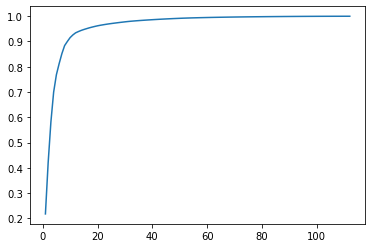

In [115]:
plt.plot(range(1,len(var_cumu)+1), var_cumu)
plt.show()

We can see that variance becomes constant with around 16 components

In [116]:
pc2 = IncrementalPCA(n_components=16)

In [117]:
X_train_pca = pc2.fit_transform(X_train_sm)

In [118]:
X_train_pca.shape

(38966, 16)

In [119]:
logreg = LogisticRegression()
model = logreg.fit(X_train_pca, y_train_sm)

In [120]:
# making the predictions
X_test[num_col] = scaler.fit_transform(X_test[num_col])
X_test_pca = pc2.transform(X_test)
y_pred = logreg.predict(X_test_pca)


    

from sklearn.metrics import confusion_matrix, accuracy_score

# Checking the Confusion matrix
print("Confusion Matirx for y_test & y_pred\n",confusion_matrix(y_pred,y_test),"\n")

# Checking the Accuracy of the Predicted model.
print("Accuracy of the logistic regression model with PCA: ",accuracy_score(y_test,y_pred))

Confusion Matirx for y_test & y_pred
 [[6436  182]
 [1880  497]] 

Accuracy of the logistic regression model with PCA:  0.7707615341856587


In [121]:
def ModelEvaluation(y_test,y_pred):
    confusion_mx_p = metrics.confusion_matrix(y_test, y_pred )

    TP = confusion_mx_p[1,1] # true positive 
    TN = confusion_mx_p[0,0] # true negatives
    FP = confusion_mx_p[0,1] # false positives
    FN = confusion_mx_p[1,0] # false negatives
    
    accuracy_s = metrics.accuracy_score(y_test, y_pred) * 100
    print('* Accuracy Score - {0}'.format(accuracy_s),'')
    sensitivity_s = round(TP/(TP+FN),2)*100
    print('* Sensitivity - {0}'.format(sensitivity_s),'')
    specificity_s = round(TN/(TN+FP),2)*100
    print('* Specificity - {0}'.format(specificity_s),'')
    false_positive_s = round(FP/(TN+FP),2)*100
    print('* False Positive - {0}'.format(false_positive_s),'')
    positive_predictive_s = round(TP/(TP+FP),2)*100
    print('* Positive Predictive Value - {0}'.format(positive_predictive_s),'')
    negative_predictive_s = round(TN/(TN+FN),2)*100
    print('* Negative Predictive Value - {0}'.format(negative_predictive_s),'')
    print('* Recall Score - {0}'.format(recall_score(y_test,y_pred)),'')

    

In [122]:
ModelEvaluation(y_test,y_pred)

* Accuracy Score - 77.07615341856588 
* Sensitivity - 73.0 
* Specificity - 77.0 
* False Positive - 23.0 
* Positive Predictive Value - 21.0 
* Negative Predictive Value - 97.0 
* Recall Score - 0.7319587628865979 


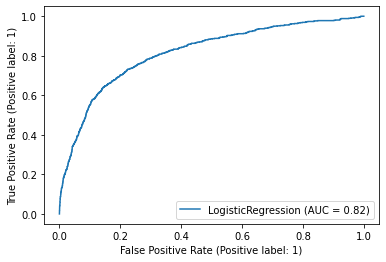

In [123]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(logreg, X_test_pca, y_test)
plt.show()

### Random Forest

In [124]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10, max_depth=4, max_features=5, random_state=100, oob_score=True)

In [125]:
X = hvc.drop(['churn'],axis=1)
y =hvc['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)
print("Dimension of X_train:", X_train.shape)
print("Dimension of X_test:", X_test.shape)

num_col = X_train.select_dtypes(include = ['int64','float64']).columns.tolist()

#scaler = MinMaxScaler()
#X_train[num_col] = scaler.fit_transform(X_train[num_col])

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_sm,y_train_sm = sm.fit_resample(X_train,y_train)

Dimension of X_train: (20986, 112)
Dimension of X_test: (8995, 112)


In [126]:
rf.fit(X_train_sm, y_train_sm)

RandomForestClassifier(max_depth=4, max_features=5, n_estimators=10,
                       oob_score=True, random_state=100)

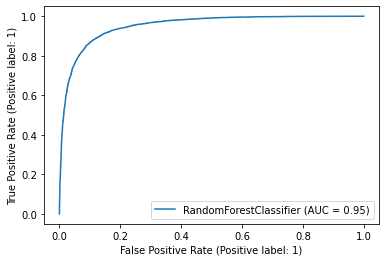

In [127]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(rf, X_train_sm, y_train_sm)
plt.show()

In [128]:
y_pred = rf.predict_proba(X_test)

predicted = (y_pred[:,1] >= 0.4).astype('int')

ModelEvaluation(y_test,predicted)

* Accuracy Score - 75.44191217342969 
* Sensitivity - 81.0 
* Specificity - 75.0 
* False Positive - 25.0 
* Positive Predictive Value - 21.0 
* Negative Predictive Value - 98.0 
* Recall Score - 0.812960235640648 


In [129]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.98      0.75      0.85      8316
           1       0.21      0.81      0.33       679

    accuracy                           0.75      8995
   macro avg       0.59      0.78      0.59      8995
weighted avg       0.92      0.75      0.81      8995



#### Random Forest with PCA

In [130]:
rf.fit(X_train_pca, y_train_sm)

RandomForestClassifier(max_depth=4, max_features=5, n_estimators=10,
                       oob_score=True, random_state=100)

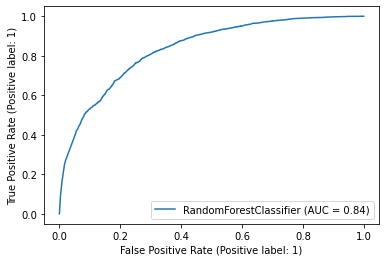

In [131]:
plot_roc_curve(rf, X_train_pca, y_train_sm)
plt.show()

In [132]:
y_pred = rf.predict_proba(X_test_pca)

predicted = (y_pred[:,1] >= 0.4).astype('int')

ModelEvaluation(y_test,predicted)

* Accuracy Score - 63.97998888271261 
* Sensitivity - 78.0 
* Specificity - 63.0 
* False Positive - 37.0 
* Positive Predictive Value - 15.0 
* Negative Predictive Value - 97.0 
* Recall Score - 0.780559646539028 


In [133]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.97      0.63      0.76      8316
           1       0.15      0.78      0.25       679

    accuracy                           0.64      8995
   macro avg       0.56      0.70      0.50      8995
weighted avg       0.91      0.64      0.72      8995



#### Hyperparameter Tuning in Random Forest and using PCA

In [134]:
from sklearn.model_selection import GridSearchCV

In [135]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

params = {
    'max_depth': [2,3,4,5,6,7,8,10],
    'min_samples_leaf': [5,10,20,50,60],
    'n_estimators': [10, 25, 50, 100]
}

In [136]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1,scoring='recall')

In [137]:
grid_search.fit(X_train_pca, y_train_sm)

Fitting 4 folds for each of 160 candidates, totalling 640 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 10],
                         'min_samples_leaf': [5, 10, 20, 50, 60],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='recall', verbose=1)

In [138]:
rf = grid_search.best_estimator_
rf

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

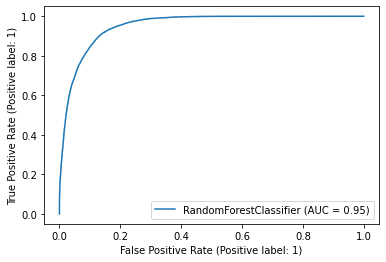

In [139]:
plot_roc_curve(rf, X_train_pca, y_train_sm)
plt.show()

In [140]:
y_pred = rf.predict_proba(X_train_pca)

predicted = (y_pred[:,1] >= 0.35).astype('int')

In [141]:
ModelEvaluation(y_train_sm,predicted)

* Accuracy Score - 85.546373761741 
* Sensitivity - 98.0 
* Specificity - 73.0 
* False Positive - 27.0 
* Positive Predictive Value - 78.0 
* Negative Predictive Value - 98.0 
* Recall Score - 0.9820356207976184 


In [142]:
y_pred = rf.predict_proba(X_test_pca)

predicted = (y_pred[:,1] >= 0.35).astype('int')

ModelEvaluation(y_test,predicted)

* Accuracy Score - 78.19899944413564 
* Sensitivity - 67.0 
* Specificity - 79.0 
* False Positive - 21.0 
* Positive Predictive Value - 21.0 
* Negative Predictive Value - 97.0 
* Recall Score - 0.6730486008836525 


In [143]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.97      0.79      0.87      8316
           1       0.21      0.67      0.32       679

    accuracy                           0.78      8995
   macro avg       0.59      0.73      0.59      8995
weighted avg       0.91      0.78      0.83      8995



#### Hyperparameter Tuning in Random Forest and without using PCA

In [144]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1,scoring='recall')
params = {
    'max_depth': [2,3,4,5,6,7,8,10],
    'min_samples_leaf': [5,10,20,50,60],
    'n_estimators': [10, 25, 50, 100]
}
grid_search.fit(X_train_sm, y_train_sm)

Fitting 4 folds for each of 160 candidates, totalling 640 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 10],
                         'min_samples_leaf': [5, 10, 20, 50, 60],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='recall', verbose=1)

In [145]:
rf = grid_search.best_estimator_
rf

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

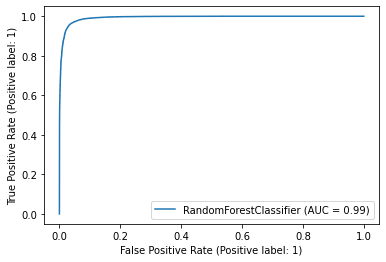

In [146]:
plot_roc_curve(rf, X_train_sm, y_train_sm)
plt.show()

In [147]:
y_pred = rf.predict_proba(X_train_sm)

predicted = (y_pred[:,1] >= 0.28).astype('int')

ModelEvaluation(y_train_sm,predicted)

* Accuracy Score - 93.85104963301339 
* Sensitivity - 99.0 
* Specificity - 89.0 
* False Positive - 11.0 
* Positive Predictive Value - 90.0 
* Negative Predictive Value - 99.0 
* Recall Score - 0.9918390391623466 


In [148]:
#y_pred = rf.predict(X_test)
y_pred = rf.predict_proba(X_test)

predicted = (y_pred[:,1] >= 0.28).astype('int')

ModelEvaluation(y_test,predicted)

* Accuracy Score - 85.28071150639244 
* Sensitivity - 80.0 
* Specificity - 86.0 
* False Positive - 14.000000000000002 
* Positive Predictive Value - 31.0 
* Negative Predictive Value - 98.0 
* Recall Score - 0.7997054491899853 


In [149]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.98      0.86      0.92      8316
           1       0.31      0.80      0.45       679

    accuracy                           0.85      8995
   macro avg       0.65      0.83      0.68      8995
weighted avg       0.93      0.85      0.88      8995



### XGBoost

In [150]:
col = X_train_sm.columns[rfe.support_]
X_train_rfe = X_train[col]


In [151]:
import xgboost as xgb
from sklearn import model_selection

xgb_model = xgb.XGBClassifier()

# Default-Run of default-hyperparameters
parameters = {'learning_rate': [0.3],
              'max_depth': [6],
              'min_child_weight': [1],
              }

scorer = metrics.make_scorer(metrics.roc_auc_score,
                             greater_is_better=True,
                             needs_proba=True,
                             needs_threshold=False)

clf_xgb = model_selection.GridSearchCV(estimator=xgb_model,
                                       param_grid=parameters,
                                       n_jobs=-1,
                                       cv=3,
                                       scoring=scorer,
                                       refit=True)

clf_xgb.fit(X_train_rfe, y_train)

[14:06:30] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [152]:
rf = clf_xgb.best_estimator_
rf

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

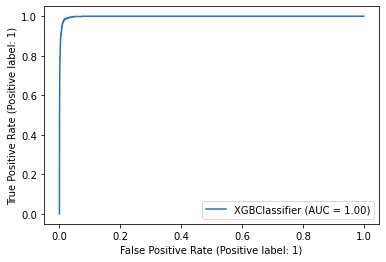

In [153]:
plot_roc_curve(rf, X_train_rfe, y_train)
plt.show()

In [154]:
#y_pred = rf.predict(X_test)
y_pred = rf.predict_proba(X_test[col])

predicted = (y_pred[:,1] > 0.1).astype('int')

ModelEvaluation(y_test,predicted)

* Accuracy Score - 90.86158977209561 
* Sensitivity - 73.0 
* Specificity - 92.0 
* False Positive - 8.0 
* Positive Predictive Value - 44.0 
* Negative Predictive Value - 98.0 
* Recall Score - 0.7290132547864506 


In [155]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95      8316
           1       0.44      0.73      0.55       679

    accuracy                           0.91      8995
   macro avg       0.71      0.83      0.75      8995
weighted avg       0.94      0.91      0.92      8995



#### 
Below are the models which we tried

Logistic Regression<br>
Logistic Regression using PCA<br>
Random Forests - with/without Hyperparamtere tuning and PCA<br>
XGBoost<br>

We can select Random Forest as model for prediction as recall score is .80 which is good

* Accuracy Score - 85.28071150639244 
* Sensitivity - 80.0 
* Specificity - 86.0 
* False Positive - 14.000000000000002 
* Positive Predictive Value - 31.0 
* Negative Predictive Value - 98.0 
* Recall Score - 0.7997054491899853 

Below are the top predictors which we got using Logistic Regression


spl_ic_mou_8              39.358070<br/>
loc_ic_t2m_mou_8          38.746343<br/>
sep_vbc_3g                37.630093<br/>
std_og_t2f_mou_8          30.084889<br/>
loc_og_t2t_mou_8          19.444338<br/>
loc_ic_t2t_mou_8          18.260084<br/>
loc_ic_t2f_mou_8          17.432894<br/>
loc_ic_t2m_mou_7          15.215073<br/>
loc_og_t2m_mou_8          14.324372<br/>
loc_ic_t2t_mou_6          13.710367<br/>
total_rech_data_8         13.479250<br/>
std_og_t2m_mou_8          11.676507<br/>

We need to target the customers who are making more calls(incoming and outgoing) to other operators(mobile/fixed line) in action phase.
We also need to target customers who receive special incoming calls in action phase and the usage is high
